> imports

In [61]:
from matplotlib import pyplot as plt
import numpy as np
from functools import lru_cache

# Задание 3
 > Аппроксимация функций

In [96]:
# setup

a, b = -1, 1
maxiter = 2000

# x^3 * sin(x)
def f(x):
    return x**3 * np.sin(x)

def omega(Q, a, y):
    return (Q.dot(a) - y).norm()

def showGraph(F, P, x, fx, label1='F(x)', label2='P(x)', title='x^3 * sin(x)'):
    ls = np.linspace(-np.pi, np.pi, maxiter)
    F_ls = np.array(list(map(F, ls.tolist())))
    P_ls = np.array(list(map(P, ls.tolist())))

    fig, ax = plt.subplots()
    plt.ylim(-10, 10)

    ax.plot(ls, F_ls, label = label1)
    ax.plot(ls, P_ls, label = label2)
    ax.scatter(x, fx, label = 'Узлы', c='red', marker='*')

    ax.set(title=title)
    ax.legend()
    ax.grid()

X:  [-1.  -0.5  0.   0.5  1. ]
F(x):  [0.84147098 0.05992819 0.         0.05992819 0.84147098]


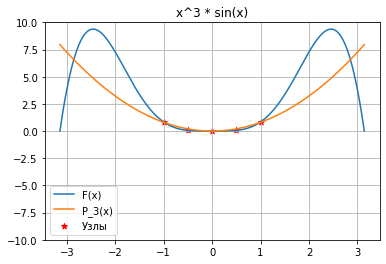

In [97]:
# 1 полином наилучшего среднеквадратичного приближения третьей степени по пяти узлам

def phi(k):
    def phi_k(x):
        return x ** k
    return phi_k

def squares(x, fx, NF):
    Phi = [ phi(i) for i in range(1, NF + 1) ]

    Q = np.array([
        [ Phi[j](x[i]) for j in range(NF) ]

        for i in range(len(x))
    ])

    H = np.matmul(Q.T, Q)
    b = Q.T.dot(fx)

    a = np.linalg.solve(H, b)
    def P(x):
        return np.sum( [ Phi[i](x)*a[i] for i in range(NF) ] )
    
    return P
    
N = 5
NF = 3
X = np.linspace(a, b, N)
FX = np.array(list(map(f, X.tolist())))

print('X: ', X)
print('F(x): ', FX)

P_x = squares(X, FX, NF)

showGraph(f, P_x, X, FX, 'F(x)', f'P_{NF}(x)')





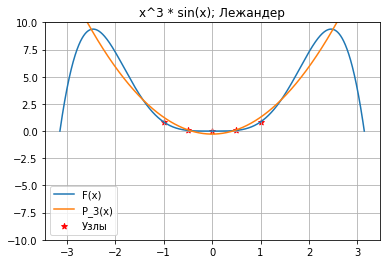

In [102]:
# 2 алгебраический полином наилучшего приближения в пространстве L2 третьей степени 

N = 5
NF = N - 2

@lru_cache(maxsize=32)
def LEG(k):
    if k == 0: 
        return lambda x: 1
    if k == 1:
        return lambda x: x
    
    return lambda x: ((2 * k - 1) * x * LEG(k - 1)(x) - (k - 1) * LEG(k - 2)(x)) / k

@lru_cache(maxsize=32)
def LEG_norm_squared(k):

    LF = lambda x: LEG(k)(x)**2

    ls = np.linspace(a, b, 100)
    L_ls = np.array(list(map(LF, ls.tolist())))

    return np.trapz(L_ls, ls)

def L2(x, fx, NF):
    A = [
        np.trapz( [ fx[i] * LEG(k)(x[i]) for i in range(len(x)) ], x) / LEG_norm_squared(k)
        for k in range(NF)
    ]

    return lambda arg: np.sum([ LEG(i)(arg) * A[i] for i in range(NF) ])


X = np.linspace(a, b, N)
FX = np.array(list(map(f, X.tolist())))

P_l2 = L2(X, FX, NF)

showGraph(f, P_l2, X, FX, label2=f'P_{NF}(x)' , title='x^3 * sin(x); Лежандер')
